# **Flight Price Prediction**

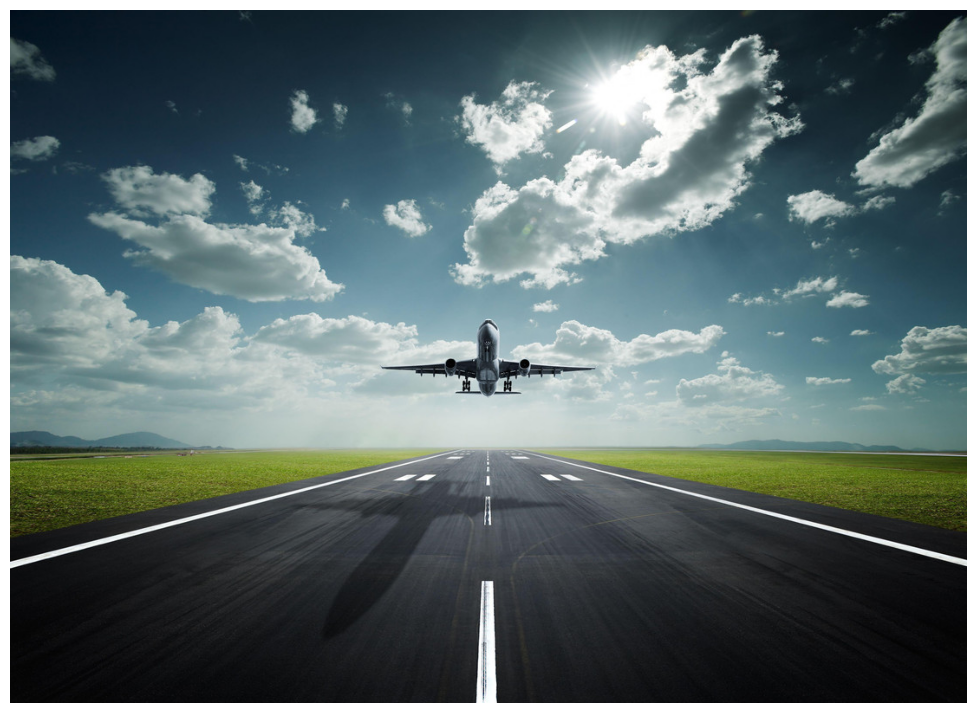

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (14 , 9))
img = mpimg.imread('/content/airoplane.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# **About Dataset**

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.



# **Import Libraries**





In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')




In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


# **Data Informations**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.drop(columns = ["Unnamed: 0"] , inplace = True)

In [ ]:
df.shape

(300153, 11)

In [ ]:
df.duplicated().sum()

0

# **Plots**

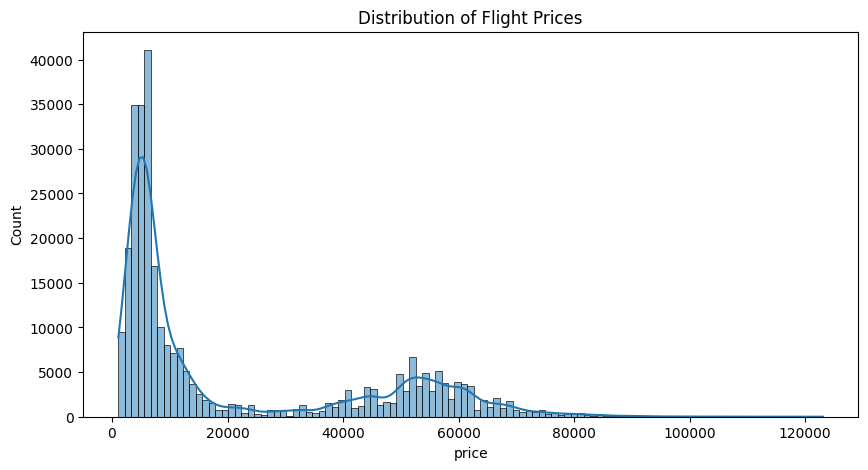

In [ ]:
plt.figure(figsize = (10 , 5))
plt.title("Distribution of Flight Prices")
sns.histplot(x = df["price"] , kde = True)
plt.show()

<Axes: title={'center': 'Distribution of Flight Prices'}, xlabel='price', ylabel='Density'>

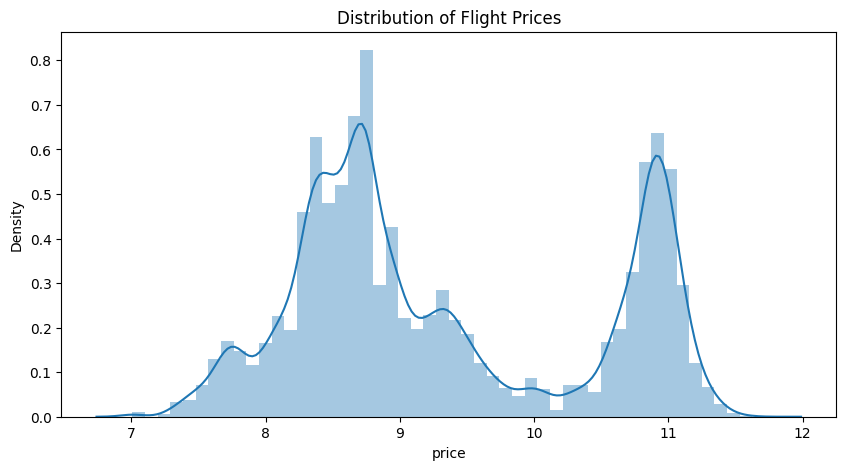

In [ ]:
plt.figure(figsize = (10 , 5))
plt.title("Distribution of Flight Prices")
sns.distplot(np.log(df['price']))

<Axes: ylabel='price'>

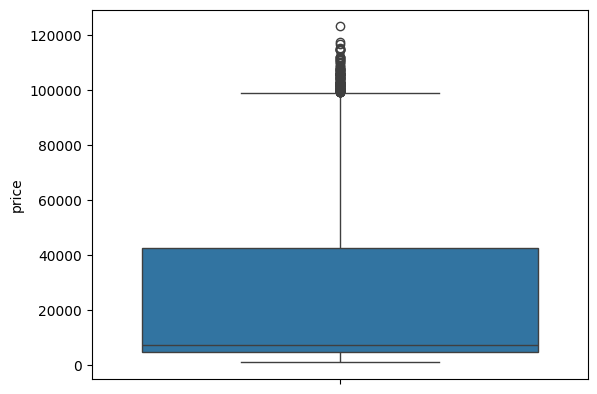

In [ ]:
sns.boxplot(df["price"])


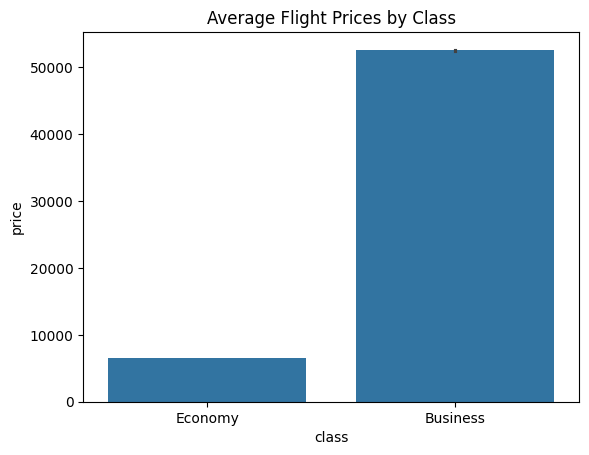

In [ ]:
sns.barplot(x = df["class"] , y = df["price"])
plt.title("Average Flight Prices by Class")
plt.show()

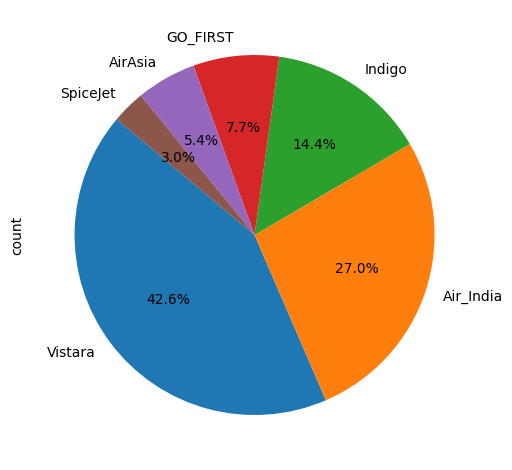

In [ ]:
sizes = df['airline'].value_counts()
sizes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.tight_layout()


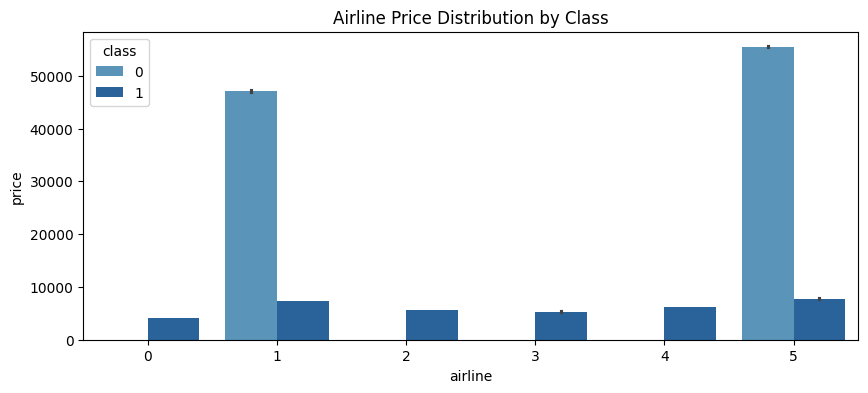

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df["airline"], y=df["price"], hue=df["class"] , palette=sns.color_palette("Blues", n_colors=4)[-2:])
plt.title("Airline Price Distribution by Class")
plt.show()

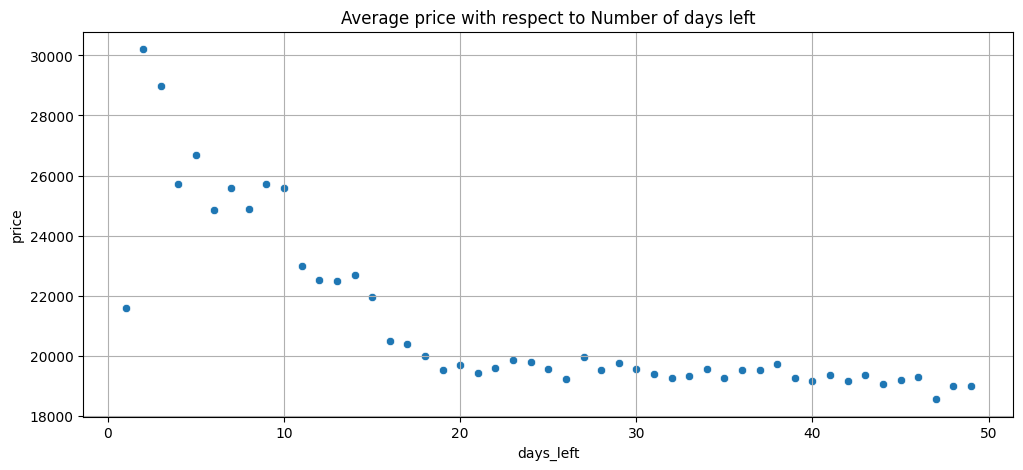

In [ ]:
plt.figure(figsize = (12 , 5))
plt.title("Average price with respect to Number of days left")
ax = sns.scatterplot(x = "days_left" , y = "price" , data = pd.DataFrame(df.groupby(["days_left"])["price"].mean()))
ax.grid(True)
ax.figure.show()

In [ ]:
days_price_mean = df.groupby('days_left')['price'].mean()

Text(0, 0.5, 'Avg Price')

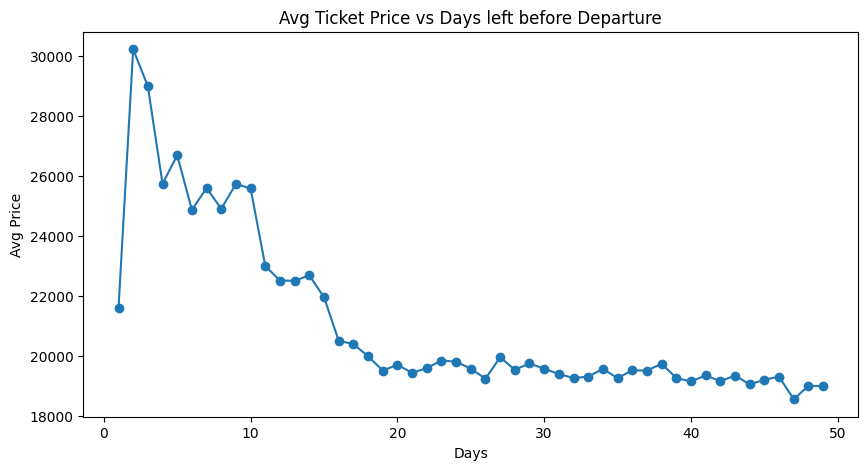

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(days_price_mean.index, days_price_mean.values, 'o-')
plt.title('Avg Ticket Price vs Days left before Departure')
plt.xlabel('Days')
plt.ylabel('Avg Price')

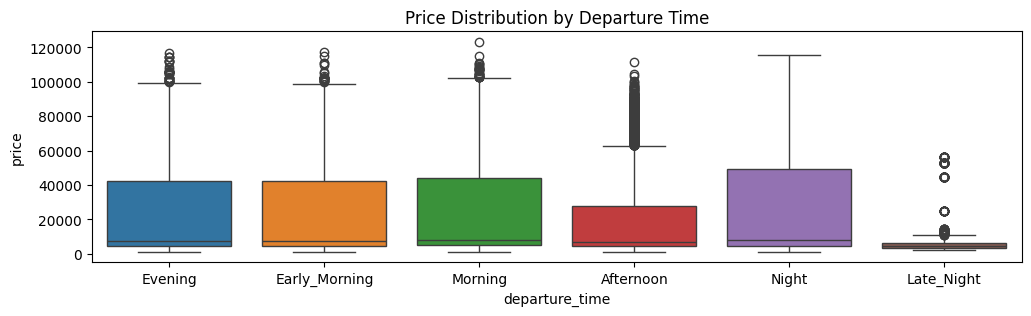

In [ ]:
plt.figure(figsize = (12 , 3))
plt.title("Price Distribution by Departure Time")
sns.boxplot(x = "departure_time" , y = "price" , data = df , hue = "departure_time")
plt.show()

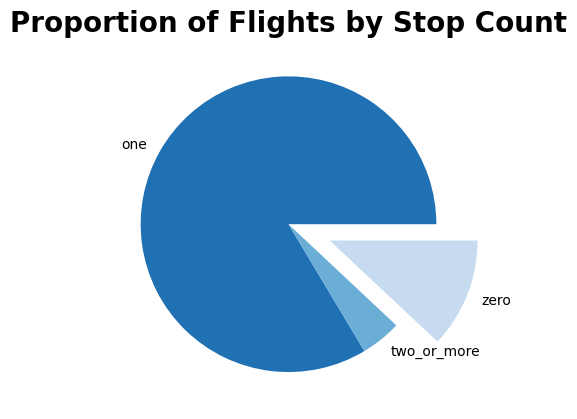

In [ ]:
plt.pie(df.groupby(["stops"])["stops"].count().values , labels = df.groupby(["stops"])["stops"].count().index , explode = (0 , 0 , 0.3) , colors=sns.color_palette("Blues", n_colors=3)[::-1])
plt.title("Proportion of Flights by Stop Count", fontsize=20, fontweight='bold')
plt.show()

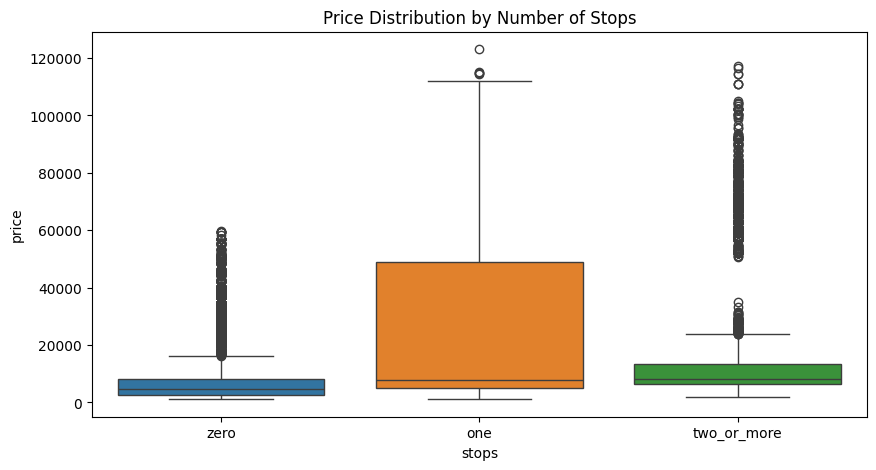

In [ ]:
plt.figure(figsize = (10 , 5))
plt.title("Price Distribution by Number of Stops")
sns.boxplot(x = "stops" , y = "price" , data = df , hue = "stops")
plt.show()

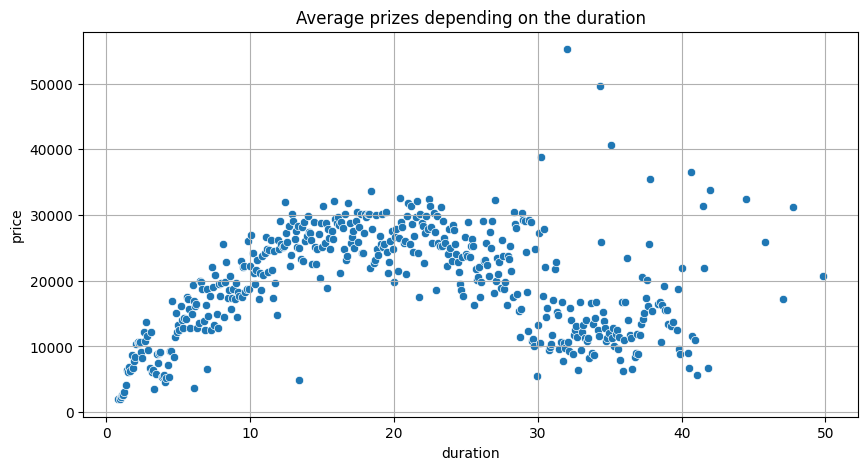

In [ ]:
plt.figure(figsize = (10 , 5))
ax = sns.scatterplot(x="duration", y="price", data = pd.DataFrame(df.groupby(["duration"])["price"].mean()))
ax.grid(True)
ax.figure.show()
plt.title("Average prizes depending on the duration")
plt.tight_layout
plt.show()

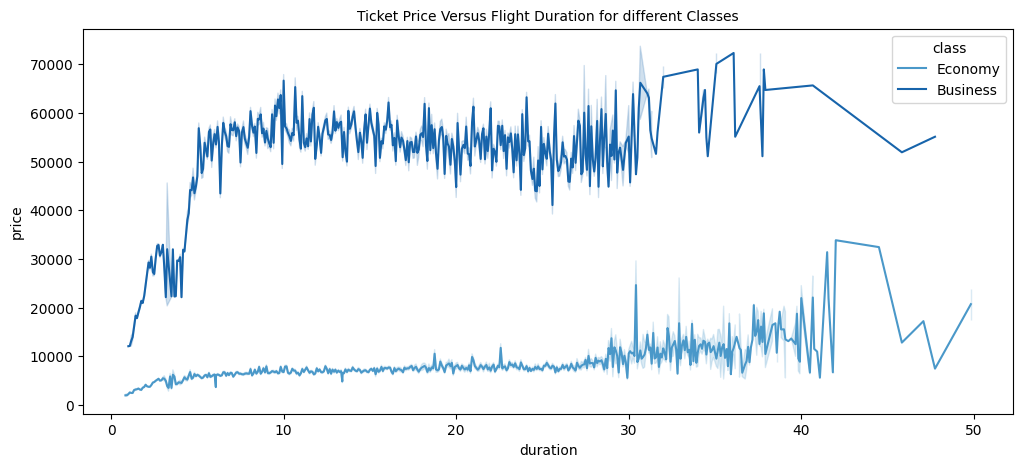

In [ ]:
plt.figure(figsize = (12 , 5))
plt.title('Ticket Price Versus Flight Duration for different Classes',fontsize=10)
sns.lineplot(x = df["duration"] , y = df["price"] , hue = df["class"] , palette=sns.color_palette("Blues", n_colors=4)[-2:])
plt.show()

In [ ]:
df[(df["source_city"] == "Delhi") & (df["destination_city"] == "Mumbai")]["price"].mean()

19355.82981228334

In [ ]:
sources = []
prices = []
dest = []

In [ ]:
for a in df["source_city"].unique():
  for b in df["destination_city"].unique():
    if a != b:
      sources.append(a)
      dest.append(b)
      prices.append(df[(df["source_city"] == a) & (df["destination_city"] == b)]["price"].mean())

In [ ]:
average_prices = pd.DataFrame({"source":sources , "destination":dest , "average_price":prices})

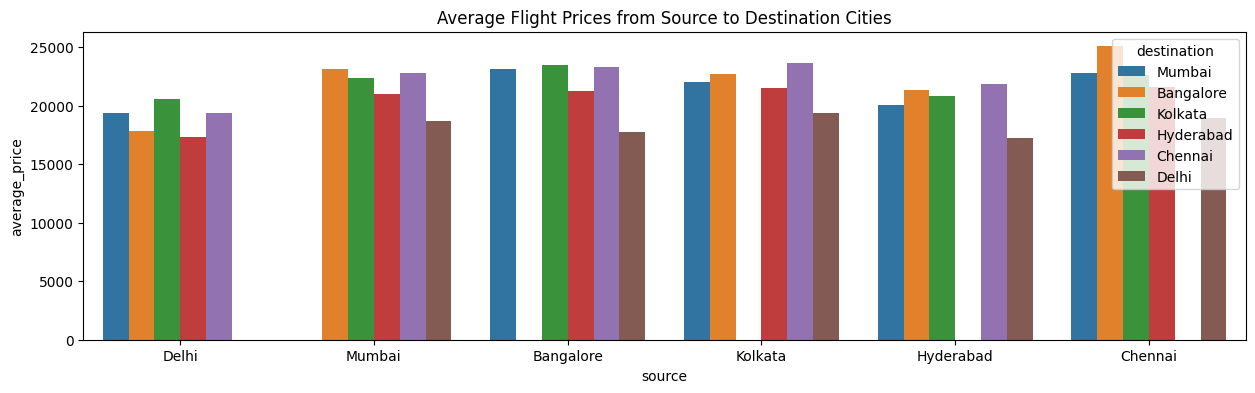

In [ ]:
plt.figure(figsize = (15 , 4))
sns.barplot(x = "source" , y = "average_price" , data = average_prices , hue = "destination")
plt.title('Average Flight Prices from Source to Destination Cities')
plt.show()

# **Preprocessing**

In [ ]:
df.drop(columns = ["flight"] , inplace = True)

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
encoder=LabelEncoder()
df['airline']=encoder.fit_transform(df['airline'])
df['source_city']=encoder.fit_transform(df['source_city'])
df['departure_time']=encoder.fit_transform(df['departure_time'])
df['stops']=encoder.fit_transform(df['stops'])
df['arrival_time']=encoder.fit_transform(df['arrival_time'])
df['destination_city']=encoder.fit_transform(df['destination_city'])
df['class']=encoder.fit_transform(df['class'])

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [ ]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


# **Correlations**

<Axes: >

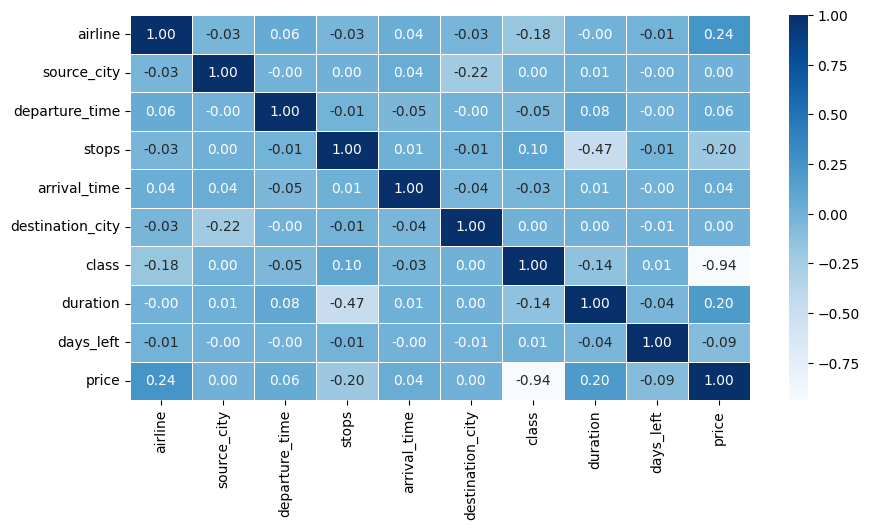

In [ ]:
plt.figure(figsize = (10 , 5))
sns.heatmap(df.corr() , annot = True , cmap="Blues" , fmt = "0.2f",linewidths=0.5, linecolor='white',)

<Axes: >

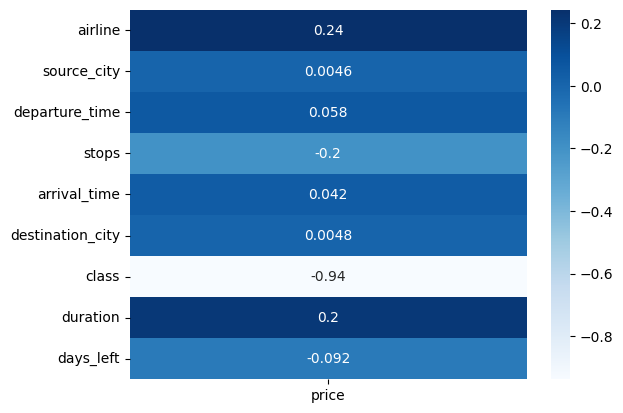

In [ ]:
sns.heatmap(pd.DataFrame(df.corr()["price"]).drop("price") , cmap = "Blues" , annot = True)

# **Spliting Training and Test Data**

In [ ]:
X=df.iloc[:,:-1]
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [ ]:
y=df.iloc[:,-1]
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

# **Normalization**

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.8       , 0.4       , 0.4       , ..., 1.        , 0.02734694,
        0.        ],
       [0.8       , 0.4       , 0.2       , ..., 1.        , 0.03061224,
        0.        ],
       [0.        , 0.4       , 0.2       , ..., 1.        , 0.02734694,
        0.        ],
       ...,
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.26530612,
        1.        ],
       [1.        , 0.2       , 0.2       , ..., 0.        , 0.18714286,
        1.        ],
       [1.        , 0.2       , 0.8       , ..., 0.        , 0.18877551,
        1.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
dec=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xg=XGBRegressor()


models=[dec,knn,rf,ab,gb,xg]
for model in models:
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)
  print("Model Name: ", model)
  print("Mean Absolute Error (MAE): " , mean_absolute_error(y_test , y_pred))
  print("Root Mean Squared Error (RMSE): " , mean_squared_error(y_test , y_pred))
  print("R2_score" , r2_score(y_test , y_pred))

  print('_'*200)

Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE):  1175.199153765853
Root Mean Squared Error (RMSE):  12099271.30558517
R2_score 0.9764424389616334
________________________________________________________________________________________________________________________________________________________________________________________________________
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE):  1894.0230881993648
Root Mean Squared Error (RMSE):  14301596.98547809
R2_score 0.972154459932145
________________________________________________________________________________________________________________________________________________________________________________________________________
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE):  1094.5779720789535
Root Mean Squared Error (RMSE):  7477345.353833426
R2_score 0.9854414356758356
_________________________________________________________________________________________________________________

# Hyperparameter Tuning - RandomForestClassifier

In [ ]:
params= {
    'n_estimators': [10, 50, 100, 200],  # Number of decision trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
}
clf=RandomizedSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

**checking the best parameter**

In [ ]:
clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [ ]:
y_pred1=clf.predict(X_test)
y_pred1
print("R-squared score:",r2_score(y_test,y_pred1))

R-squared score: 0.9645987875259238


In [ ]:
import pickle
pickle.dump(rf,open("Flight_prediction.sav","wb"))


In [ ]:
pickle.dump(scaler2,open("MinmaxScaler1.sav","wb"))